# 로지스틱회귀 
    -선형 방정식을 사용한 분류 알고리즘 입니다

# 다중분류
    -타깃클래스가 2개 이상 인 분류 문제 입니다.로지스틱회귀는 다중 분류를 위햐 소프트 맥스함수사용

# 1.1데이터준비

In [1]:
import pandas as pd

In [9]:
fish=pd.read_csv("fish.csv")
print(fish.shape)
print(fish.head())

(159, 6)
  Species  Weight  Length  Diagonal   Height   Width
0   Bream   242.0    25.4      30.0  11.5200  4.0200
1   Bream   290.0    26.3      31.2  12.4800  4.3056
2   Bream   340.0    26.5      31.1  12.3778  4.6961
3   Bream   363.0    29.0      33.5  12.7300  4.4555
4   Bream   430.0    29.0      34.0  12.4440  5.1340


In [7]:
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [19]:
fish_data=fish.drop(["Species"],axis=1).to_numpy()

In [17]:
fish_data=fish_data.to_numpy()

In [20]:
fish_data

array([[2.42000e+02, 2.54000e+01, 3.00000e+01, 1.15200e+01, 4.02000e+00],
       [2.90000e+02, 2.63000e+01, 3.12000e+01, 1.24800e+01, 4.30560e+00],
       [3.40000e+02, 2.65000e+01, 3.11000e+01, 1.23778e+01, 4.69610e+00],
       [3.63000e+02, 2.90000e+01, 3.35000e+01, 1.27300e+01, 4.45550e+00],
       [4.30000e+02, 2.90000e+01, 3.40000e+01, 1.24440e+01, 5.13400e+00],
       [4.50000e+02, 2.97000e+01, 3.47000e+01, 1.36024e+01, 4.92740e+00],
       [5.00000e+02, 2.97000e+01, 3.45000e+01, 1.41795e+01, 5.27850e+00],
       [3.90000e+02, 3.00000e+01, 3.50000e+01, 1.26700e+01, 4.69000e+00],
       [4.50000e+02, 3.00000e+01, 3.51000e+01, 1.40049e+01, 4.84380e+00],
       [5.00000e+02, 3.07000e+01, 3.62000e+01, 1.42266e+01, 4.95940e+00],
       [4.75000e+02, 3.10000e+01, 3.62000e+01, 1.42628e+01, 5.10420e+00],
       [5.00000e+02, 3.10000e+01, 3.62000e+01, 1.43714e+01, 4.81460e+00],
       [5.00000e+02, 3.15000e+01, 3.64000e+01, 1.37592e+01, 4.36800e+00],
       [3.40000e+02, 3.20000e+01, 3.73

In [21]:
fish.columns

Index(['Species', 'Weight', 'Length', 'Diagonal', 'Height', 'Width'], dtype='object')

fish_data2=fish['Species', 'Weight', 'Length', 'Diagonal', 'Height', 'Width'].to_nupy

In [24]:
fish_taget=fish['Species'].to_numpy()

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Ytest=train_test_split(fish_data,fish_taget,random_state=42)

In [26]:
# 표준화
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(X_train)
train_scaled=ss.transform(X_train)
test_scaled=ss.transform(X_test)

# 1.2 k-최근접 이웃분류기의 확률예측

In [29]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled,Y_train)
print(kn.score(train_scaled,Y_train))
print(kn.score(test_scaled,Ytest))

0.8907563025210085
0.85


In [30]:
kn.classes_#공부하고난다음 시스템에서 변환해

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [31]:
test_scaled[:5]

array([[-0.88741352, -0.91804565, -1.03098914, -0.90464451, -0.80762518],
       [-1.06924656, -1.50842035, -1.54345461, -1.58849582, -1.93803151],
       [-0.54401367,  0.35641402,  0.30663259, -0.8135697 , -0.65388895],
       [-0.34698097, -0.23396068, -0.22320459, -0.11905019, -0.12233464],
       [-0.68475132, -0.51509149, -0.58801052, -0.8998784 , -0.50124996]])

In [32]:
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [33]:
import numpy as np
proba=kn.predict_proba(test_scaled[:5]) #praba 은  검증된 증빙되
print(np.round(proba,decimals=4))

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


# 2.0 로지스틱 회귀

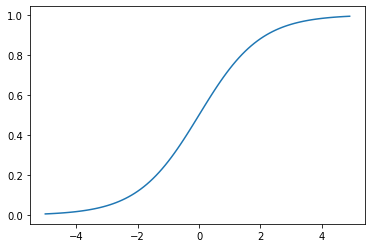

In [34]:
import numpy as np
import matplotlib.pyplot as plt
z=np.arange(-5,5,0.1)
phi=1/(1 + np.exp(-z))
plt.plot(z,phi)
#선형그래프

# 2.1로지스틱회귀로 이진분류수행하기

In [36]:
char_arr=np.array(["A","B","C","D","E"])
print(char_arr[[True,False,True,False,False]])

['A' 'C']


In [50]:
baemam_smelt_indexes=(Y_train=="Bream")|(Y_train=="Smelt")
baemam_smelt_indexes

array([ True, False,  True, False, False, False, False,  True, False,
       False, False,  True, False, False, False,  True,  True, False,
       False,  True, False,  True, False, False, False,  True, False,
       False,  True, False, False, False, False,  True, False, False,
        True,  True, False, False, False, False, False,  True, False,
       False, False, False, False,  True, False,  True, False, False,
        True, False, False, False,  True, False, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False, False, False, False,  True, False,  True, False,
       False,  True,  True, False, False, False,  True, False, False,
       False, False, False,  True, False, False, False,  True, False,
        True, False, False,  True,  True, False, False, False, False,
       False, False, False, False,  True,  True, False, False,  True,
       False, False])

In [51]:
X_train_bream_smelt=train_scaled[baemam_smelt_indexes]
Y_train_bream_smelt=Y_train[baemam_smelt_indexes]

In [53]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(verbose=1)
lr.fit(X_train_bream_smelt,Y_train_bream_smelt)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(verbose=1)

In [54]:
print(lr.predict(X_train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [56]:
print(lr.predict_proba(X_train_bream_smelt[:5]))

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [58]:
print(lr.classes_)

['Bream' 'Smelt']


In [61]:
print("기울기",lr.coef_,"\n","절편(편향)",lr.intercept_)

기울기 [[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] 
 절편(편향) [-2.16155132]


# 2.2 로지스틱 회귀로 다중분류

In [62]:
lr=LogisticRegression(C=20,max_iter=1000) #규제가 클수로 작아진다
lr.fit(train_scaled,Y_train)
print(lr.score(train_scaled,Y_train))
print(lr.score(test_scaled,Ytest))

0.9327731092436975
0.925


In [63]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [64]:
prba=lr.predict_proba(train_scaled[:5])
print(np.round(prba,decimals=3))

[[0.998 0.001 0.    0.    0.    0.    0.002]
 [0.    0.    0.001 0.999 0.    0.    0.   ]
 [0.    0.002 0.051 0.    0.006 0.941 0.   ]
 [0.    0.001 0.86  0.001 0.135 0.    0.004]
 [0.009 0.783 0.007 0.    0.187 0.    0.014]]


In [66]:
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [67]:
print("기울기",lr.coef_,"\n","절편(편향)",lr.intercept_)

기울기 [[-1.48986217 -1.02993738  2.59442523  7.70317852 -1.20029196]
 [ 0.19634317 -2.00935252 -3.78045585  6.50474233 -1.99514592]
 [ 3.56250912  6.34406973 -8.4900971  -5.75745418  3.79323748]
 [-0.1050809   3.60284123  3.93066839 -3.61707744 -1.75102734]
 [-1.40030385 -6.07531395  5.25937344 -0.87220402  1.86069287]
 [-1.38523809  1.49231584  1.39234448 -5.67720457 -4.4010109 ]
 [ 0.62163272 -2.32462296 -0.90625859  1.71601937  3.69354577]] 
 절편(편향) [-0.09220027 -0.26297954  3.25070805 -0.14650445  2.65466181 -6.78781452
  1.38412892]


In [ ]:
decision=lr.decision_function(test_scaled[:5])
print(np.round(decision,decimals=2))